In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#Importing the three required libraries for this project.

In [4]:
df = pd.read_csv('projectfinaldata.csv')
df = df[['AGE', 'SEX', 'TOPOGRAPHY', 'STAGE', 'T', 'N', 'M', 'SURGERY']]
df.columns = df.columns.str.lower()

#Cleaning the CSV file... there was a column for "Length of Stay" but if we are trying to predict the type of Surgery, we would not know the length of stay.

df['sex'] = df['sex'].replace({'F': '0', 'M': '1'})
df['topography'] = df['topography'].replace({'cec': '1', 'colon_asc': '2', 'colon_desc': '3', 'colon_trans': '4', 'ungh_hep': '5', 'colon_sigm': '6', 'jonc_rect_sigm': '7', 'rect': '8', 'ungh_splen':'9'})
df['stage'] = df['stage'].replace({'one': '1', 'two': '2', 'three': '3', 'four': '4'})
df['t'] = df['t'].replace({'T1': '1', 'T2': '2', 'T3': '3', 'T4': '4'})
df['n'] = df['n'].replace({'Nx': '0', 'N0': '0', 'N1': '1', 'N2': '2', 'N3': '3'})
df['m'] = df['m'].replace({'Mx': '0', 'M0': '0', 'M1': '1', 'M1_hep': '1'})

#Replacing with numbers (0, 1, 2, 3, etc.)

df['age'] = df['age'].astype(int)
df['sex'] = df['sex'].astype(int)
df['stage'] = df['stage'].astype(int)
df['t'] = df['t'].astype(int)
df['n'] = df['n'].astype(int)
df['m'] = df['m'].astype(int)

#Conversion of type to integers.

df.head(100)

,age,sex,topography,stage,t,n,m,surgery
0,67,0,1,3,3,0,0,eight
1,84,1,1,3,3,0,0,eight
2,80,1,1,3,3,0,0,eight
3,41,1,1,4,4,1,0,eight
4,86,1,2,3,3,1,0,eight
...,...,...,...,...,...,...,...,...
95,76,0,6,2,3,0,0,five
96,69,1,6,2,2,0,0,five
97,71,1,6,3,4,0,0,five
98,61,1,6,4,3,0,1,five


Text(0.5, 1.0, 'Age Distribution')

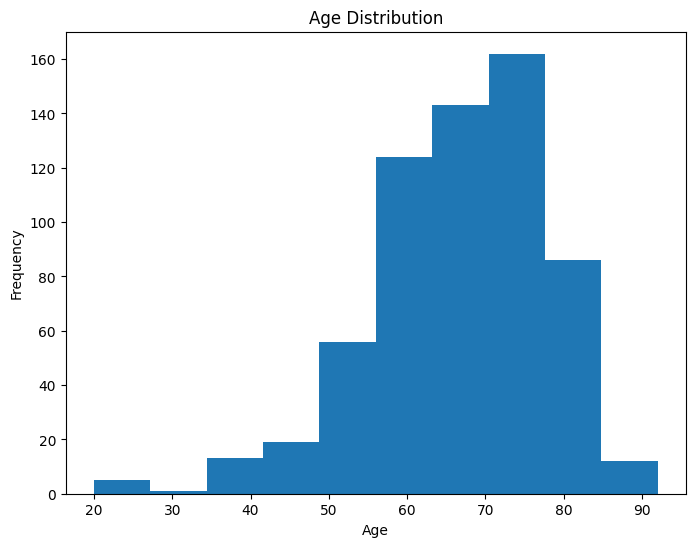

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

#Age distribution histogram, bins = 10.

([<matplotlib.axis.XTick at 0x1aea210ac10>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

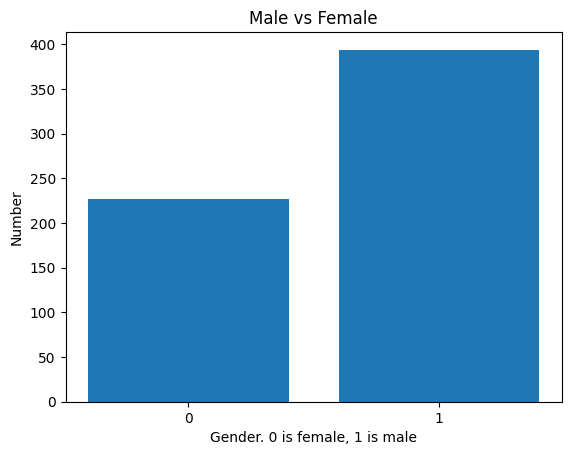

In [6]:
sexcount = df['sex'].value_counts()
plt.bar(sexcount.index, sexcount.values)
plt.title('Male vs Female')
plt.xlabel('Gender. 0 is female, 1 is male')
plt.ylabel('Number')
plt.xticks([0, 1])

#Bar graph showcasing # of females vs # of males.


([<matplotlib.axis.XTick at 0x1aea468bb10>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

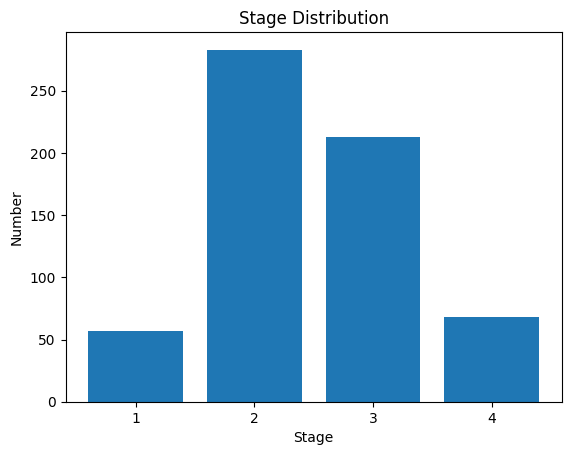

In [7]:
stagecount = df['stage'].value_counts()
plt.bar(stagecount.index, stagecount.values)
plt.title('Stage Distribution')
plt.xlabel('Stage')
plt.ylabel('Number')
plt.xticks([1, 2, 3, 4])

#Bar graph showcasing # of stage 1 vs # of stage 2 vs # of stage 3 vs # of stage 4

In [9]:
X = df.drop(columns=['surgery'])
y = df['surgery']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=4,
    weights='distance',
    algorithm='brute'
)
knn.fit(X_train, y_train)

#Training the KNN Model
#n_neighbors = number of neighbors we would like to include in our calculations.
#Weights = closer points are weighted more, as opposed to weights = 'uniform'
#Algorithm = Specific algorithm used to compute nearest neighbor. Brute is most exhaustive, but can be slow for big datasets.

KNeighborsClassifier(algorithm='brute', n_neighbors=4, weights='distance')

In [10]:
knn.score(X_test, y_test)
#KNN Score

0.56

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10
    
)
model.fit(X_train, y_train)

#Training the Random Forest Model
#n=estimators = number of trees in the Random Forest Model
#Max_depth is the depth of each tree... too high of a max_depth risks overfitting, where the trees fit the specific dataset and not the population
#Min_samples_split = Minimum number of samples needed for a node in the tree to split.

RandomForestClassifier(max_depth=10, min_samples_split=10)

In [9]:
model.score(X_test, y_test)
#Random Forest Score

0.632

In [11]:
df = pd.read_csv('wisco.csv')
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[11:31], axis=1)
df.head()

#Cleaning the Wisco Breast Cancer CSV. There are many more parameters, but for simplicity sake we are only using 10.

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [12]:
print(df.shape)
count_m = df['diagnosis'].value_counts()
print(count_m)

#Helps us determine the number of parameters, number of patients, number of benign tumors, number of malignant tumors.

(569, 11)
diagnosis
B    357
M    212
Name: count, dtype: int64


In [13]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(
    n_neighbors=10,
    weights='distance',
    algorithm='brute'
)
knn.fit(X_train, y_train)

##KNN Classifier, same hyperparameters as last KNN model.

KNeighborsClassifier(algorithm='brute', n_neighbors=10, weights='distance')

In [13]:
knn.score(X_test, y_test)

0.9122807017543859

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10
    
)
model.fit(X_train, y_train)

#Random Forest Classifier, same hyperparameters as last Random Forest Model.

RandomForestClassifier(max_depth=10, min_samples_split=10)

In [15]:
model.score(X_test, y_test)

0.956140350877193

In [18]:
userinput = []
feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 
'symmetry_mean', 'fractal_dimension_mean']
      
def doyouhavecancer():
    counter = 0
    while counter < len(feature_names):
        variable = float(input(feature_names[counter]))
        userinput.append(variable)
        counter += 1
        if variable < 0:
            break
        else:
            continue


    new_data_df = pd.DataFrame([userinput], columns=feature_names)
    prediction = model.predict(new_data_df)
    print(prediction)
    file = open("wisco.txt", "a")
    file.write(f"{userinput}, {prediction}\n")
    file.close()


print("The purpose of this code is to predict whether a person has a malignant or benign tumor based on 10 parameters. ['M'] = Malignant, ['B'] = Benign")
yesorno = input("Would you like to get screened for cancer? Type Y or N.")
if yesorno.lower() == "y":
    doyouhavecancer()
else:
    print("Have a good day!")

The purpose of this code is to predict whether a person has a malignant or benign tumor based on 10 parameters. ['M'] = Malignant, ['B'] = Benign


Would you like to get screened for cancer? Type Y or N. y
radius_mean 3
texture_mean 3
perimeter_mean 3
area_mean 3
smoothness_mean 3
compactness_mean 3
concavity_mean 3
concave points_mean 3
symmetry_mean 8
fractal_dimension_mean 8


['B']
